### Data Analysis

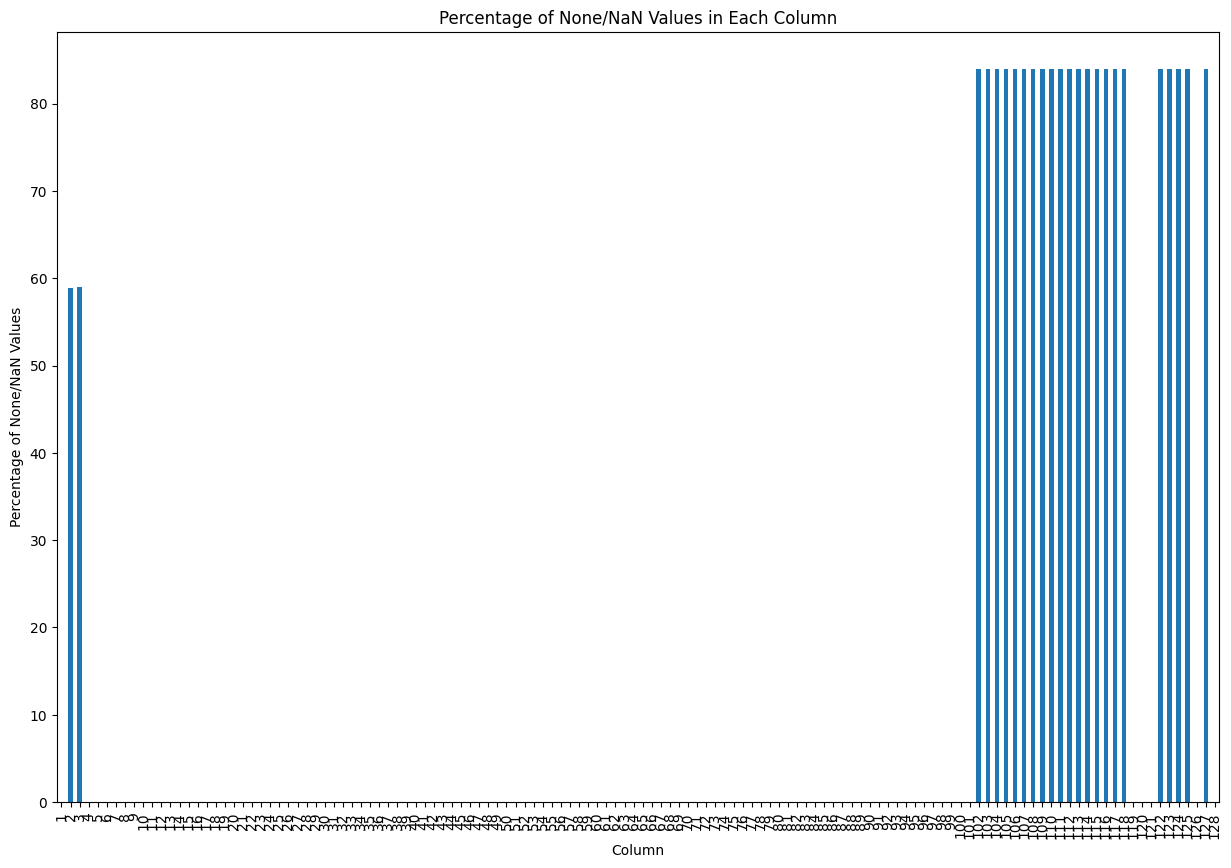


Types of data:
state                    int64
county                  object
community               object
communityname           object
fold                     int64
                        ...   
LemasPctPolicOnPatr     object
LemasGangUnitDeploy     object
LemasPctOfficDrugUn    float64
PolicBudgPerPop         object
ViolentCrimesPerPop    float64
Length: 128, dtype: object


In [2]:
import pandas as pd
from matplotlib import pyplot as plt

# Wczytywanie danych
file_path = 'communities.data'
column_names = [
    'state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack',
    'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up',
    'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
    'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap',
    'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
    'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf',
    'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par',
    'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig',
    'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8',
    'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup',
    'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous',
    'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos',
    'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ',
    'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg',
    'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85',
    'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq',
    'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack',
    'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked',
    'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy',
    'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop'
]

data = pd.read_csv(file_path, names=column_names)

# Konwersja '?' na NaN dla prawidłowego obsłużenia brakujących danych
data.replace('?', pd.NA, inplace=True)
# Brakujące dane
none_frequency = data.isna().mean() * 100

plt.figure(figsize=(15, 10))
none_frequency.plot(kind='bar')
plt.title('Percentage of None/NaN Values in Each Column')
plt.xlabel('Column')
plt.ylabel('Percentage of None/NaN Values')
plt.xticks(range(len(none_frequency)), [str(i + 1) for i in range(len(none_frequency))], rotation=90)
plt.show()

#show types of data
print("\nTypes of data:")
print(data.dtypes)


### Data Preparation

In [3]:
from sklearn.model_selection import train_test_split

# Drop column 'communityname'
data = data.drop('communityname', axis=1)

# Change to numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Dropping columns with missing data
threshold_for_missing_data = 0.5
missing_values = data.isna().sum()
columns_to_drop = missing_values[missing_values > len(data) * threshold_for_missing_data].index
data_cleaned = data.drop(columns=columns_to_drop)

# Show columns to drop
dropped_columns = columns_to_drop.tolist()
print(f'Dropped columns: communityname, {dropped_columns}')
print(f'Numbers of dropped columns: {len(dropped_columns) + 1}')

# Division of data into training and test sets
y = data_cleaned['ViolentCrimesPerPop']
X = data_cleaned.drop('ViolentCrimesPerPop', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Dropped columns: communityname, ['county', 'community', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'PolicBudgPerPop']
Numbers of dropped columns: 25


## Model selection
### Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

model = LinearRegression()

# Cross-validation MSE
mse_scores = -cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
print("Average MSE from cross validation:", np.mean(mse_scores))
print("MSE standard deviation from cross-validation:\n", np.std(mse_scores))

# Cross-validation R^2
r2_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='r2')
print("Average R2 from cross validation:", np.mean(r2_scores))
print("R^2 standard deviation from cross validation:\n", np.std(r2_scores))

# Training
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# MSE & R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error (MSE) on the test set:", mse)
print("Coefficient of determination (R^2) on the test set:", r2)

Average MSE from cross validation: 0.020128531723535983
MSE standard deviation from cross-validation:
 0.0009486604878870101
Average R2 from cross validation: 0.6400330061200256
R^2 standard deviation from cross validation:
 0.014345968327446659
Mean squared error (MSE) on the test set: 0.016964903579527374
Coefficient of determination (R^2) on the test set: 0.6511023781783278


#### Detecting features with low correlation to the label

In [5]:
# Calculating correlation with the target variable
feature_correlation = data_cleaned.corr()['ViolentCrimesPerPop'].sort_values()

# Setting low correlation threshold
low_correlation_threshold = 0.05
low_corr_features = feature_correlation[abs(feature_correlation) < low_correlation_threshold]
print("Features with low correlation with 'ViolentCrimesPerPop':\n", low_corr_features)

Features with low correlation with 'ViolentCrimesPerPop':
 PctEmplManu           -0.044906
PersPerOccupHous      -0.039739
householdsize         -0.034923
fold                  -0.032577
PctWorkMomYoungKids   -0.022535
PctSameState85        -0.019459
PctVacMore6Mos         0.021283
racePctAsian           0.037622
Name: ViolentCrimesPerPop, dtype: float64


### Detecting features with low importance (RandomForestRegressor)

In [6]:
from sklearn.ensemble import RandomForestRegressor

# RF training
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Importance threshold
low_importance_threshold = 0.002
low_importance_features = feature_importances[feature_importances < low_importance_threshold]
print("Features of low importance:\n", low_importance_features)

Features of low importance:
 pctUrban               0.001973
pctWWage               0.001955
population             0.001944
numbUrban              0.001853
PctBSorMore            0.001847
PersPerFam             0.001816
RentMedian             0.001749
PctRecentImmig         0.001690
OwnOccLowQuart         0.001659
RentHighQ              0.001640
medIncome              0.001536
PersPerOccupHous       0.001529
RentLowQ               0.001516
PctRecImmig5           0.001441
OwnOccMedVal           0.001415
LemasPctOfficDrugUn    0.001381
perCapInc              0.001374
PctRecImmig8           0.001345
MedRent                0.001244
PctRecImmig10          0.001227
MedNumBR               0.000376
dtype: float64


### Removing features with low correlation and importance

In [7]:
unique_values_set = set(low_corr_features.index.tolist()) | set(low_importance_features.index.tolist())
unique_values_series = pd.Series(list(unique_values_set))

X_train_dropped = X_train.drop(unique_values_series, axis=1)
X_test_dropped = X_test.drop(unique_values_series, axis=1)

### Linear Regression after data modification

In [8]:
model = LinearRegression()

# Cross-validation MSE
mse_scores = -cross_val_score(model, X_train_dropped, y_train, cv=3, scoring='neg_mean_squared_error')
print("Average MSE from cross validation:", np.mean(mse_scores))
print("MSE standard deviation from cross-validation:\n", np.std(mse_scores))

#  Cross-validation R^2
r2_scores = cross_val_score(model, X_train_dropped, y_train, cv=3, scoring='r2')
print("Average R2 from cross validation:", np.mean(r2_scores))
print("R^2 standard deviation from cross validation:\n", np.std(r2_scores))

# Training on dropped data set
model.fit(X_train_dropped, y_train)
y_pred = model.predict(X_test_dropped)

# MSE & R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error (MSE) on the test set:", mse)
print("Coefficient of determination (R^2) on the test set:", r2)

Average MSE from cross validation: 0.01985764309553427
MSE standard deviation from cross-validation:
 0.0006879264243783835
Average R2 from cross validation: 0.644785415713056
R^2 standard deviation from cross validation:
 0.011854677876976858
Mean squared error (MSE) on the test set: 0.017473768081739862
Coefficient of determination (R^2) on the test set: 0.6406371483690847


#### Random Forest with selecting GridSearchCV hyperparameters


In [9]:
from sklearn.model_selection import GridSearchCV

# Best params
param_grid = {
    'n_estimators': [300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_dropped, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

best_rf = grid_search.best_estimator_

# Optimal RF
y_pred_best_rf = best_rf.predict(X_test_dropped)

# MSE & R^2
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("Optimal Random Forest - MSE:", mse_best_rf)
print("Optimal Random Forest - R^2:", r2_best_rf)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'criterion': 'friedman_mse', 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 500}
Optimal Random Forest - MSE: 0.016665838623460872
Optimal Random Forest - R^2: 0.6572529024918125


### XGBoost withh selecting GridSearchCV hyperparameters

In [10]:
import xgboost as xgb

# Best params
param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 10],
    'alpha': [5, 10],
    'n_estimators': [100, 200]
}

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')

grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_dropped, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Optimal XGBoost
best_xgb = grid_search.best_estimator_

y_pred_best_xgb = best_xgb.predict(X_test_dropped)

# MSE & R^2
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

print("Optimal XGBoost - MSE:", mse_best_xgb)
print("Optimal XGBoost - R^2:", r2_best_xgb)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters: {'alpha': 5, 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Optimal XGBoost - MSE: 0.017287720266048513
Optimal XGBoost - R^2: 0.644463379395718


### Neuron network

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Model compilation
model.compile(optimizer='adam', loss='mean_squared_error')

# Model Training
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Model Prediction
y_pred_nn = model.predict(X_test).flatten()

# MSE & R^2
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Neuron network - MSE:", mse_nn)
print("Neuron network - R^2:", r2_nn)

ModuleNotFoundError: No module named 'tensorflow.python'